In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# load behavior data and state activity data
# homeDir = "D:/BU/ChandLab/PsychRNN/"
# archiveDir = "D:/BU/ChandLab/PsychRNNArchive/"

homeDir = "/home/tianwang/code/behaviorRNN/PsychRNN/"
archiveDir = "/home/tianwang/code/behaviorRNN/PsychRNNArchive/"

stateActivity = np.load( archiveDir + "stateActivity/stateActivityBasic2InputNoise0.5.npy",allow_pickle='TRUE').item()
checker_df = pd.read_csv(homeDir + "resultData/basic2InputNoise0.5.csv")



In [3]:
checker_df.head()

,Unnamed: 0,trial,coherence,coherence_bin,green_side,correct_side,target_onset,checker_onset,decision,green_decision,decision_time,correct_decision
0,0,0,0.809629,0.8,0.0,0.0,319.0,800.0,0.0,1,101.0,1
1,1,1,-0.077049,-0.1,1.0,0.0,396.0,582.0,1.0,1,4022.0,0
2,2,2,0.292959,0.3,1.0,1.0,480.0,628.0,1.0,1,432.0,1
3,3,3,0.260041,0.3,0.0,0.0,376.0,867.0,0.0,1,567.0,1
4,4,4,0.239099,0.2,0.0,0.0,342.0,924.0,0.0,1,524.0,1


In [5]:
state = stateActivity["state"]
y = stateActivity["y"]
RT = checker_df["decision_time"]
choice = checker_df["decision"]

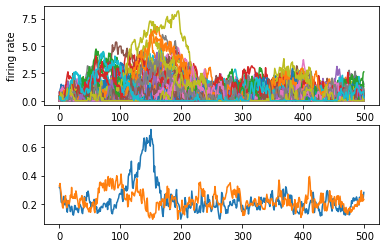

In [8]:
trialNum = 5
plt.figure()
plt.subplot(211)
_ = plt.plot(state[trialNum,:,:])
plt.xlabel("time step (10ms)")
plt.ylabel("firing rate")
plt.subplot(212)
_ = plt.plot(y[trialNum,:,:])


In [6]:

# reshape state matrix to: (#units, #timestep, #trials)
temp = np.transpose(state, (2,1,0))
a, b, c = temp.shape



In [7]:
# save temp as .mat file
from scipy.io import savemat
mdic = {"temp": temp}
savemat("temp.mat", mdic)

In [7]:
# conduct pca
from sklearn.decomposition import PCA

# pca = PCA(n_components=temp2.shape[1])
pca = PCA(0.95)
pca.fit(temp2)
orthState = pca.transform(temp2)

<IPython.core.display.Javascript object>


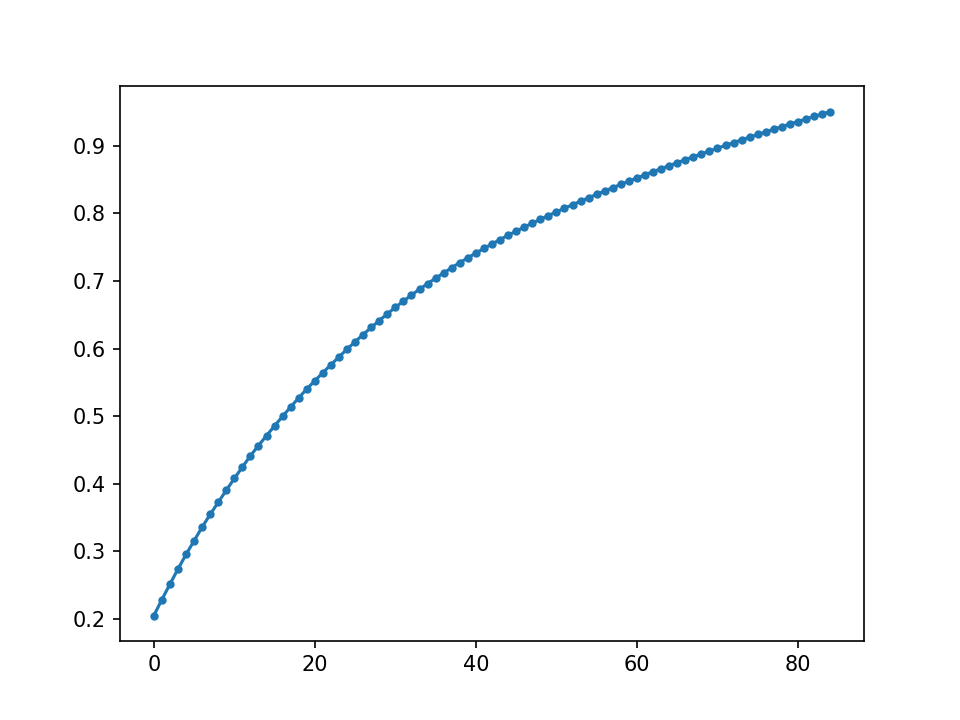

In [19]:
# mmm = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '.-')


In [9]:
a, b, c = state.shape
test = np.transpose(orthState)
latent = np.zeros((test.shape[0],b,a))
for i in range(state.shape[0]):
    latent[:,:,i] = test[:, np.arange(0,b) + (i - 1)*b]
    

In [10]:
left = latent[:,:, choice == 0]
leftAve = np.sum(left, axis = 2)
right = latent[:,:,(choice == 1)]
rightAve = np.sum(right, axis = 2)


<IPython.core.display.Javascript object>


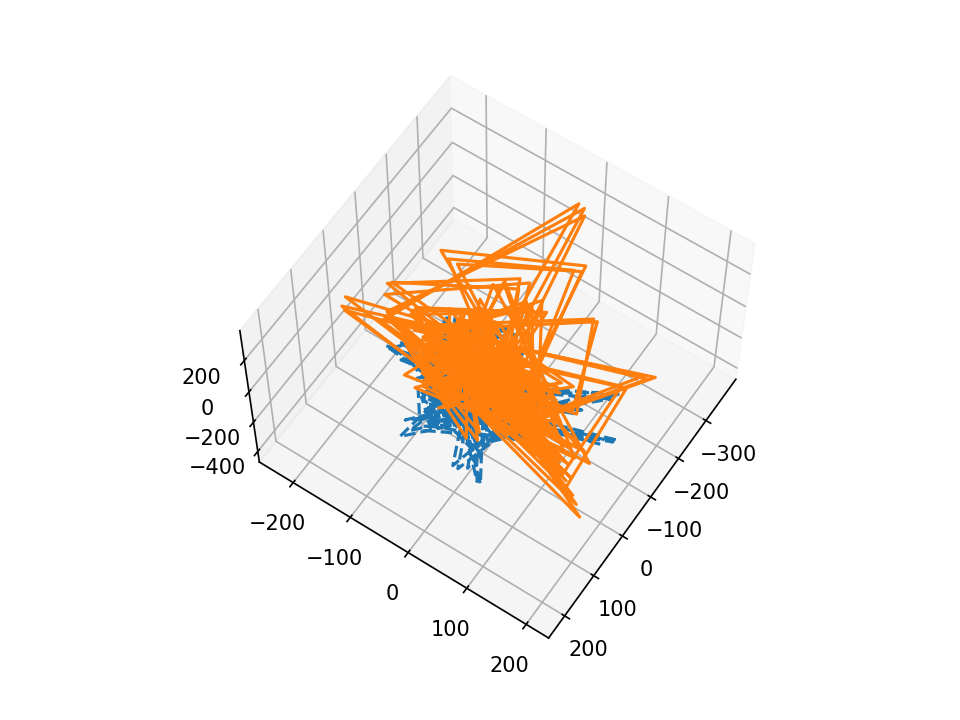

In [34]:
# %matplotlib notebook

fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.plot3D(leftAve[1,:], leftAve[2,:], leftAve[3,:], '--')
ax.plot3D(rightAve[1,:], rightAve[2,:], rightAve[3,:], '-')

ax.view_init(45, 45)
plt.show()


<IPython.core.display.Javascript object>


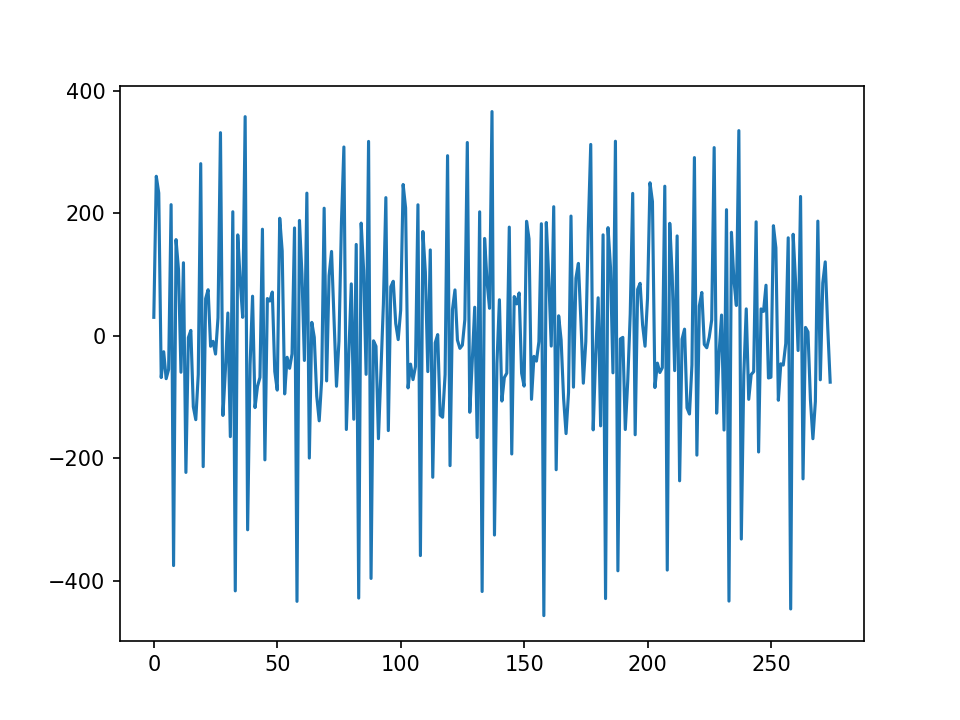

In [33]:
plt.plot(leftAve[3,:])
plt.show()

In [72]:
restore = pca.inverse_transform(orthState)

In [73]:
restore = np.transpose(restore)

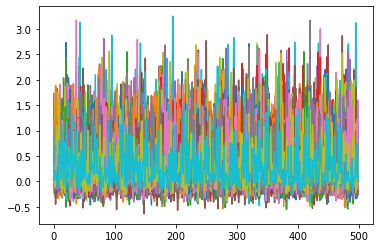

In [78]:
restoreData = np.zeros((100,500,5000))

for i in range(5000):
    restoreData[:,:,i] = restore[:, np.arange(0,500) + (i - 1)*500]
    
_ = plt.plot(np.transpose(restoreData[:,:,5]))

In [76]:
len(np.arange(0,500))

500